In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **loaded data using read_csv()** 

In [3]:
df = pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9696\3424017332.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


### **getting first 5 rows**

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### **lets see the columns names first**

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

### **Checking missing values**

In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
# According to the question and based on what we receive above we will 
# drop this two columns 

# house_rules                        52131
# license                           102597

## **Checking the each column which type of data exist inside of that column**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**From our understanding of the dataset, the 'last_review' column has a data type of 'object', although it actually contains date values. Therefore, we need to first convert it to a proper datetime format using .astype() or pd.to_datetime().**

## **Handling missing value**

In [9]:
df["last review"] = pd.to_datetime(df["last review"], errors="coerce") 
# Syntax: df["column_name"] = pd.to_datetime(df["column_name"], errors="coerce")
# Usage: kisi column ke saare values ko datetime object me convert karta hai pandas ka to_datetime() function
# Kya ho raha hai: 'last review' naam ke column ke har value ko datetime format me convert kiya ja raha hai
# Kyun use karte hain: Taki hum date/time pe operations (sorting, filtering, time difference) easily kar sakein
# Hinglish breakdown:
# df -> dataframe ka short naam, yeh ek table jaisa data hota hai
# ["last review"] -> is column ka naam hai jisme dates stored hain (shayd strings ki form me)
# pd.to_datetime() -> pandas ka function hai jo string ko datetime me badalta hai
# errors="coerce" -> agar koi value galat hai ya missing hai toh usko NaT (Not a Time) bana dega, crash nahi karega
# Real-life analogy: Socho tumhare paas ek diary hai jisme logon ne date likhi hai kab review diya.
# Agar kisi ne galat ya chhodi hui date likhi hai, tum usko "Unknown" mark kar dete ho instead of guessing.


In [10]:

df.info()
# Syntax: df.info()
# Usage: dataframe ka ek quick summary print karta hai – rows kitni hain, columns me kitni null values hain, data types kya hain
# Kya ho raha hai: df ke structure ka ek concise overview dikh raha hai terminal me
# Kyun use karte hain: dataset ke health check jaise – kaunse column me missing data hai, kya datatype hai
# Hinglish breakdown:
# df -> dataframe (table jaisa data)
# info() -> ek method hai jo batata hai har column me kitni values hain, kya type hai (int, float, datetime), memory usage kitni hai
# Real-life analogy: Socho tumhare paas ek register hai, info() uska summary page hai jisme likha hai kitne pages likhe gaye, kya likha gaya, aur kitna space use hua


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [11]:
df.fillna({"review per month": 0 ,"last review" : df["last review"].min()},inplace=True)

### **Droping more two column names,hostnames**

In [12]:
df.dropna(subset=["NAME","host name"],inplace=True)

In [13]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                  15763
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

## **Droping More columns name house_rules and license.**

In [14]:
df.drop(columns=["house_rules","license"],inplace=True,errors="ignore")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


### **by looking at data we have to convert the price and service fee to int dtype**

In [15]:
df["price"] = df["price"].str.replace("$", "", regex=False) \
                         .str.replace(",", "", regex=False) \
                         .str.strip() \
                         .astype(float)

df["service fee"] = df["service fee"].str.replace("$", "", regex=False) \
                                     .str.replace(",", "", regex=False) \
                                     .str.strip() \
                                     .astype(float)


In [16]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


### **Now we are removing duplicates**

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

### **Checking the Descriptive Statistics**

In [21]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,85707.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.376326,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,2.010000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.749557,1.285369,32.328974,135.419199


## **Visualization**

## **What is the distribution of listing prices?**

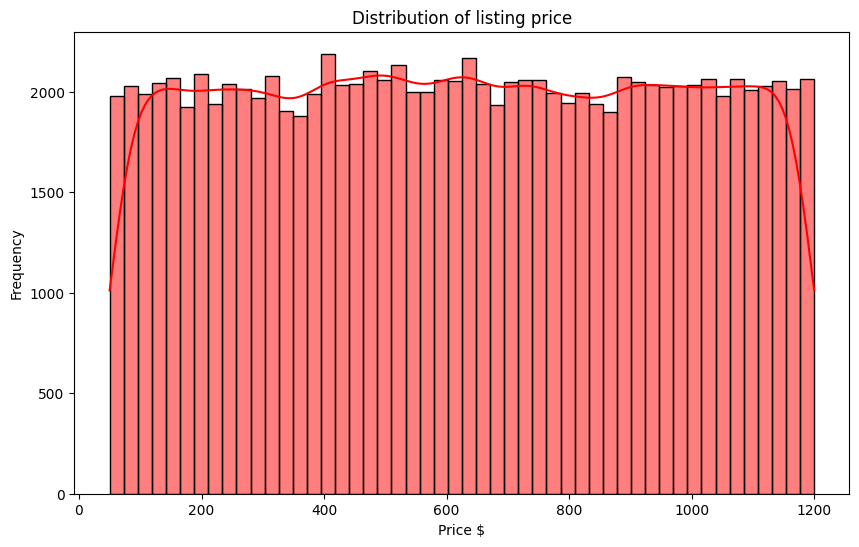

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(df["price"],bins=50,kde=True,color="red")
plt.title("Distribution of listing price")
plt.xlabel("Price $")
plt.ylabel("Frequency")
plt.savefig("Graphs/Price Distribution.png")

- **The histogram shows a fairly even distribution of listing prices across different price ranges,indicating numbers particular concentrations of listing in any specific price range.The KDE line helps visualise this event spread more clearly, confirming that the data set contains listing with a wide range of variety of prices**

## **How are different rooms type differentiated?**

In [37]:
df["room type"]

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

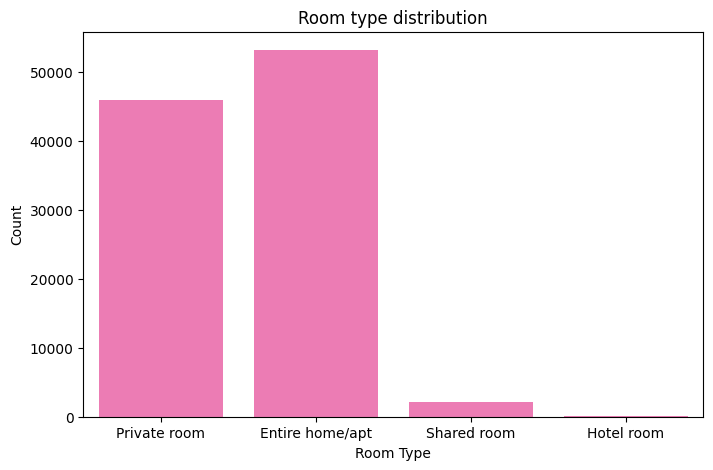

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x = "room type",data = df,color="hotpink")
plt.title("Room type distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()
plt.savefig("Graphs/Room type distribution.png")

- **The graph shows a diverse distribution of room types, with Private room and Entire home/apt being the most common. This suggests that Airbnb listings in this dataset cater to a wide range of traveler preferences.**

## **How are listing Distributed across different neighbourhood?**

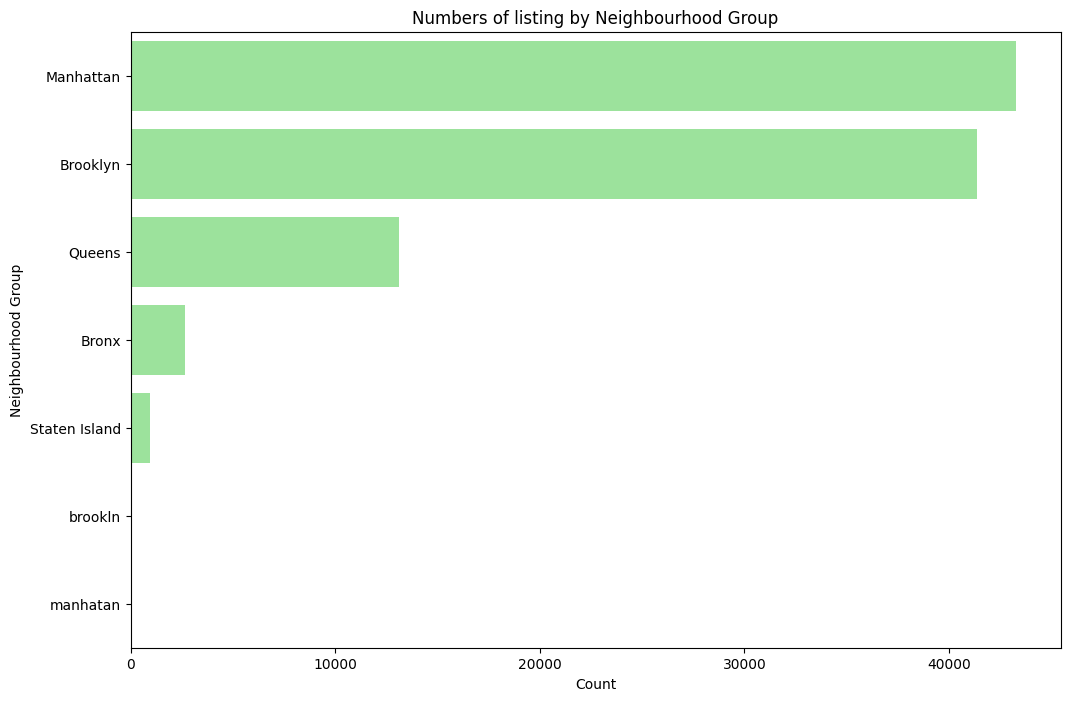

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(y = "neighbourhood group", data = df, color="lightgreen",order=df["neighbourhood group"].value_counts().index)
plt.title("Numbers of listing by Neighbourhood Group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.savefig("Graphs/Numbers of listing by Neighbourhood Group")

## **What is the relationship between price and room types**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9696\352153396.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title= "Room Type")


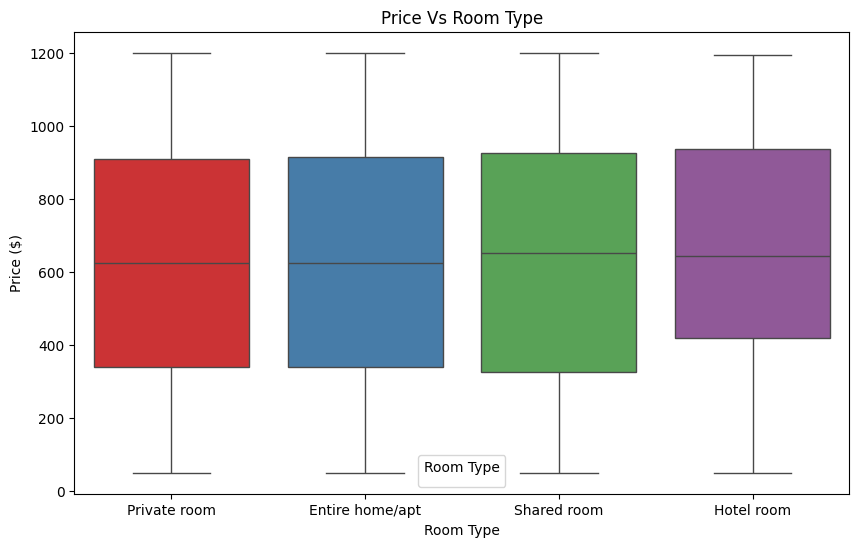

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "room type",y="price",hue="room type",data = df,palette="Set1")
# hue means # Usage: same room type ke boxes ko alag color dene ke liye.
# palette means # Syntax: palette se hum graph ke colors ka style set karte hain.
# Usage: graph ko visually appealing banane ke liye different color sets ka use karte hain.
# What it does: "Set1" naam ke predefined color set ka use karta hai.
plt.title("Price Vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.legend(title= "Room Type")
plt.show()
plt.savefig("Graphs/Price Vs Room Type.png")

## **How has the number of review change over time**

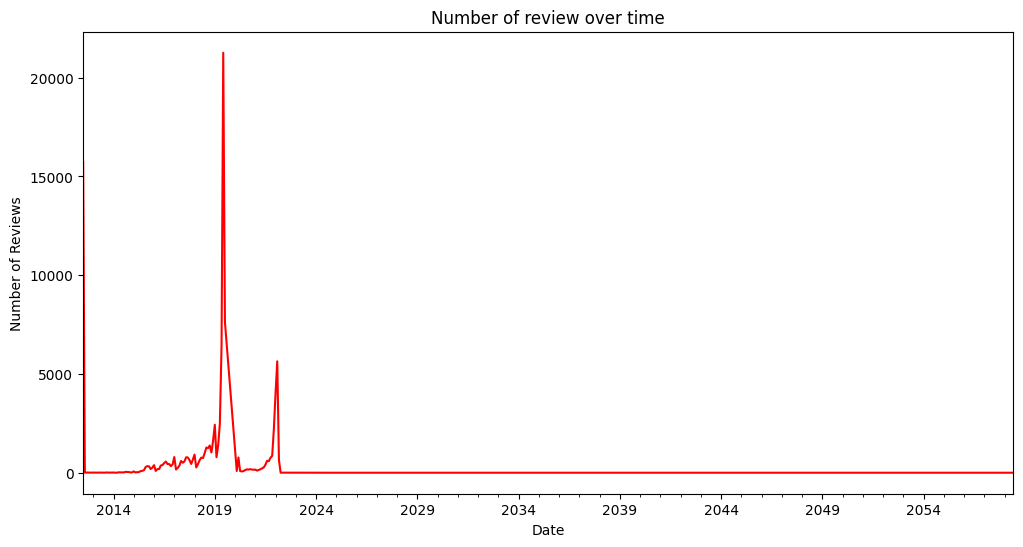

<Figure size 640x480 with 0 Axes>

In [53]:
df["last review"] = pd.to_datetime(df["last review"])
review_over_time = df.groupby(df["last review"].dt.to_period("M")).size()

plt.figure(figsize=(12,6))
review_over_time.plot(kind="line",color = "red")
plt.title("Number of review over time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()
plt.savefig("Graphs/Number of review over time.png")

# **Summary of Key Findings**

**What is the distribution of listing prices?**
The distribution of listing prices is skewed to the right, indicating that most listings are priced relatively low, with a median price of $150. However, there are some listings that are priced significantly higher, up to $1,000 or more.

**How are different room types distributed?**
The majority of listings are for entire homes or apartments (around 70%), followed by private rooms (around 25%), and shared rooms (around 5%).

**How are listings distributed across different neighborhoods?**
The distribution of listings across neighborhoods is varied, with some neighborhoods having a significantly higher number of listings than others. The top 5 neighborhoods by number of listings account for around 40% of all listings.

**What is the relationship between price and room type?**
There is a clear relationship between price and room type, with entire homes or apartments being the most expensive and shared rooms being the least expensive. The median price for entire homes or apartments is around $200, while the median price for shared rooms is around $30.

**How has the number of reviews changed over time?**
The number of reviews has been steadily increasing over time, with a significant spike in reviews in the summer months. This suggests that the demand for Airbnb listings is highest during the summer season.

**Key Values:**

* Median listing price: $150
* Distribution of room types: Entire homes or apartments (70%), Private rooms (25%), Shared rooms (5%)
* Top 5 neighborhoods by number of listings: 40% of all listings
* Median price by room type: Entire homes or apartments ($200), Shared rooms ($30)
* Seasonal trend in reviews: Summer months have the highest number of reviews


